# 半導体セクター比較

材料メーカー vs. 製造装置

In [8]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import yfinance as yf

In [9]:
def weekly_chart(ticker: yf.Ticker) -> pd.DataFrame:
    df = ticker.history(interval='1wk', period='2y')

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    mpf.plot(
        df,
        type='candle',
        style='yahoo',
        mav=(13, 26, 52),
        volume=False,
        datetime_format='%Y-%m-%d',
        xrotation=0,
        ax=ax,
    )
    ax.set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' % (ticker.info['longName'], ticker.info['symbol']))
    ax.grid()

    return df

## 東京エレクトロン

                                   Open          High           Low  \
Date                                                                  
2022-09-05 00:00:00+09:00  13626.948675  13709.381899  13458.910147   
2022-09-12 00:00:00+09:00  13855.226983  13944.001581  12970.648438   
2022-09-19 00:00:00+09:00  12970.648019  13214.778388  12548.966602   
2022-09-26 00:00:00+09:00  12488.728326  12529.944942  11119.058197   
2022-10-03 00:00:00+09:00  11548.649697  12768.394371  11493.501335   

                                  Close    Volume  Dividends  Stock Splits  
Date                                                                        
2022-09-05 00:00:00+09:00  13611.095703   4095900    0.00000           0.0  
2022-09-12 00:00:00+09:00  12970.648438  21410100    0.00000           0.0  
2022-09-19 00:00:00+09:00  12812.121094  10380600    0.00000           0.0  
2022-09-26 00:00:00+09:00  11318.801758  26498400  285.66666           0.0  
2022-10-03 00:00:00+09:00  12596.461914 

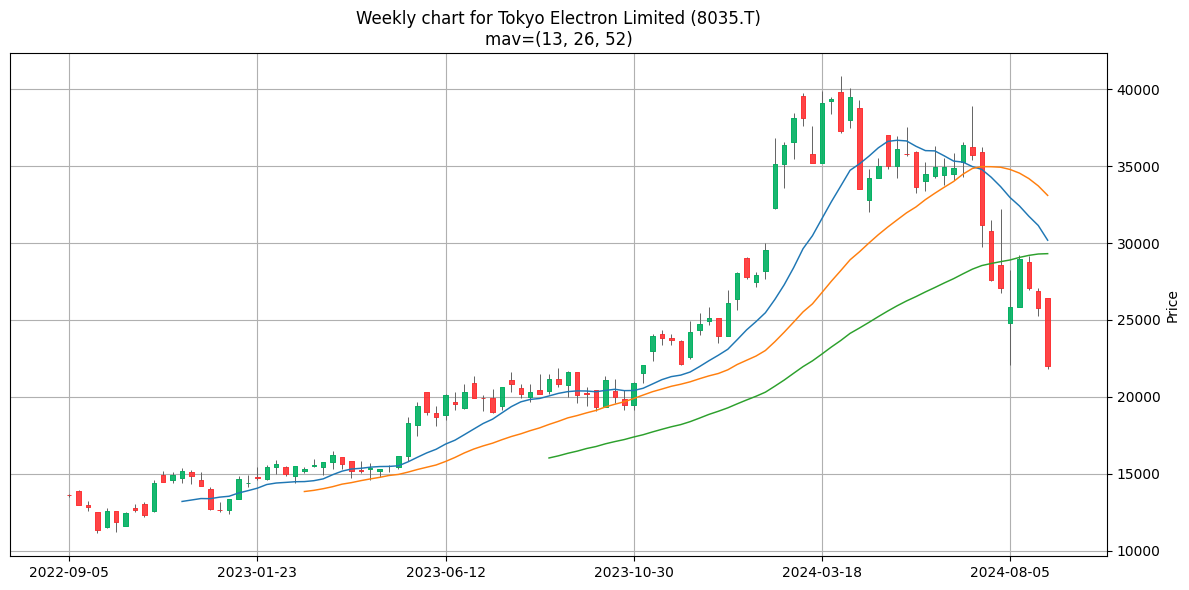

In [10]:
symbol1 = '8035.T' # 東京エレクトロン
ticker1 = yf.Ticker(symbol1)
df1 = weekly_chart(ticker1)
print(df1.head())
plt.tight_layout()
plt.savefig('weekly_chart_20240913_8035.png')
plt.show()

## 信越化学

                                  Open         High          Low        Close  \
Date                                                                            
2022-09-05 00:00:00+09:00  3110.662388  3143.094931  3105.892897  3138.325439   
2022-09-12 00:00:00+09:00  3199.374826  3203.190419  3032.442627  3032.442627   
2022-09-19 00:00:00+09:00  3032.442596  3086.814798  2949.453447  2970.439209   
2022-09-26 00:00:00+09:00  2894.127216  2894.127216  2706.209266  2733.872314   
2022-10-03 00:00:00+09:00  2811.257031  3037.940058  2798.663529  2994.347168   

                             Volume  Dividends  Stock Splits  
Date                                                          
2022-09-05 00:00:00+09:00   7866500        0.0           0.0  
2022-09-12 00:00:00+09:00  30663500        0.0           0.0  
2022-09-19 00:00:00+09:00  16186500        0.0           0.0  
2022-09-26 00:00:00+09:00  41917500       45.0           0.0  
2022-10-03 00:00:00+09:00  38902500        0.0        

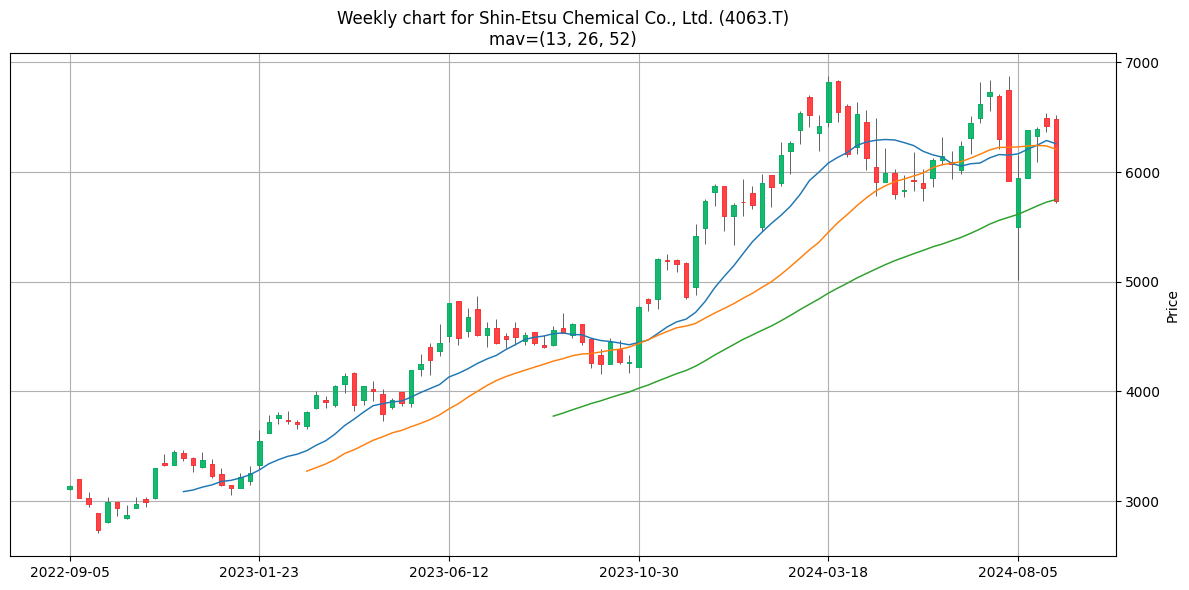

In [11]:
symbol2 = '4063.T' # 信越化学
ticker2 = yf.Ticker(symbol2)
df2 = weekly_chart(ticker2)
print(df2.head())
plt.tight_layout()
plt.savefig('weekly_chart_20240913_4063.png')
plt.show()

In [12]:
def change_ratio(ticker, df):
    ser = pd.Series(df['Close'])
    origin = ser.iloc[0]
    return pd.Series([(v - origin) / origin for v in ser], name=ticker.info['symbol'], index=df.index)

In [13]:
series1 = change_ratio(ticker1, df1)
series2 = change_ratio(ticker2, df2)

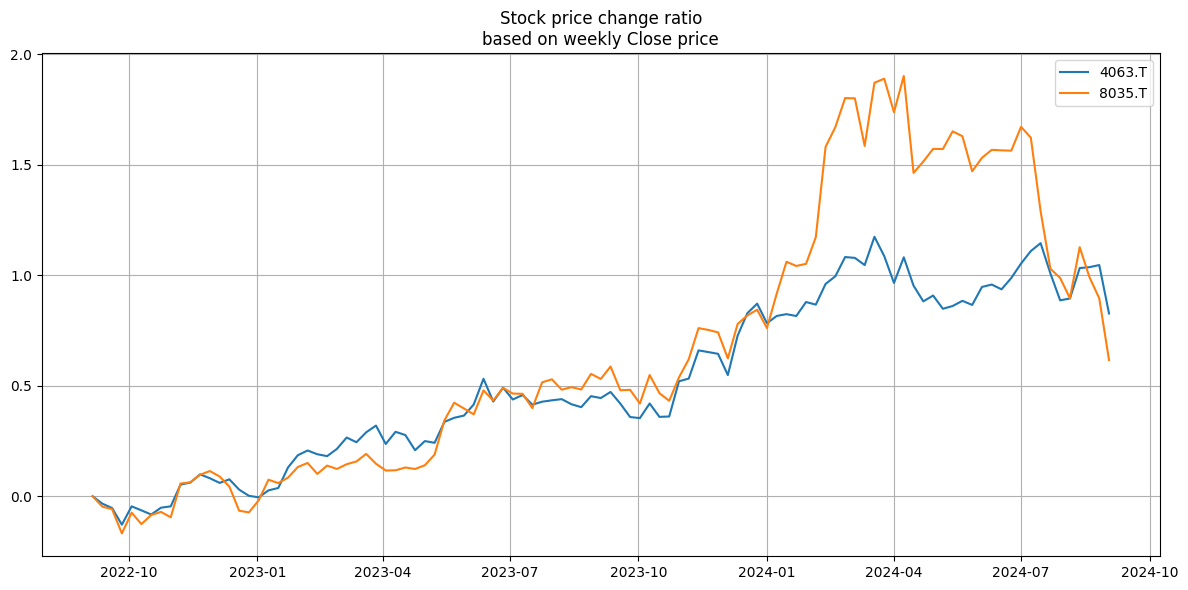

In [14]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ax.plot(series2, label=series2.name)
ax.plot(series1, label=series1.name)

ax.set_title('Stock price change ratio\nbased on weekly Close price')

plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.savefig('weekly_chart_20240913_4063_8035.png')

plt.show()